# Titanic Death Prediction Project

### Importing train and test data given in Kaggle

In [2]:
# Importing important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading train data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv',encoding = "latin1", sep=";")
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Reading test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,78.292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,96.875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,86.625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,122.875,NaN,S


In [5]:
# Joining two datasets to do cleaning and training
frames = [df_train, df_test]
pd.set_option('display.max_rows', 5000)
df = pd.concat(frames)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Doing basic analysis using visualizations

In [6]:
# Reading the names of all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Getting information about the data types in each cell
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   object 
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   object 
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 132.9+ KB


Here we see that there are both numeric and categoric figures in columns. So we can divide our data into two groups: numeric data and categoric data. This will help analyze our results much better using different visualization techniques for different data types.

In [8]:
# Dividing data into two groups
df_num = df.select_dtypes(include = ["int64", "float64"]) # columns with numbers
df_object = df.select_dtypes(include = ["object"]) # columns with objects

In [9]:
df_num.head()

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0.0,3,1,0
1,2,1.0,1,1,0
2,3,1.0,3,0,0
3,4,1.0,1,1,0
4,5,0.0,3,0,0


In [10]:
df_object.head()

,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.925,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1,C123,S
4,"Allen, Mr. William Henry",male,35.0,373450,8.05,NaN,S


In [11]:
# Analyzing numerical data
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
SibSp,1309.0,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,0.385027,0.865560,0.0,0.0,0.0,0.0,9.0


0.0    549
1.0    342
Name: Survived, dtype: int64


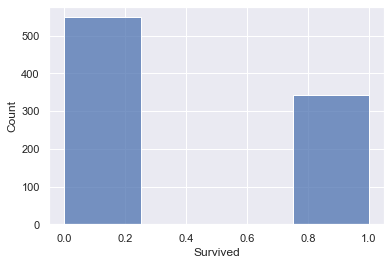

In [12]:
# Making histograms for better view
# Histogram and info for Survived column
sns.set(style = 'darkgrid')
survived_info = df['Survived'].value_counts()
survived_hist = sns.histplot(data=df_num['Survived'], bins = 4)
print(survived_info)

3    709
1    323
2    277
Name: Pclass, dtype: int64


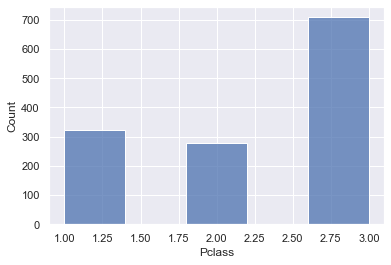

In [13]:
#Histogram for Pclass
sns.set(style = 'darkgrid')
sns.histplot(data = df_num['Pclass'], bins = 5)
print(df_num['Pclass'].value_counts())

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


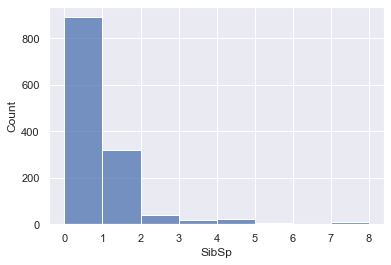

In [14]:
#Histogram for SibSp
sns.set(style = 'darkgrid')
sns.histplot(data = df_num['SibSp'], bins = 8)
print(df_num['SibSp'].value_counts())

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


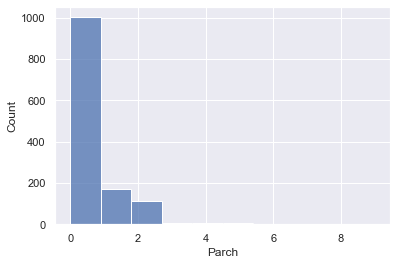

In [15]:
#Histogram for Parch
sns.set(style = 'darkgrid')
sns.histplot(data = df_num['Parch'], bins = 10)
print(df_num['Parch'].value_counts())

             PassengerId  Survived    Pclass     SibSp     Parch
PassengerId     1.000000 -0.005007 -0.038354 -0.055224  0.008942
Survived       -0.005007  1.000000 -0.338481 -0.035322  0.081629
Pclass         -0.038354 -0.338481  1.000000  0.060832  0.018322
SibSp          -0.055224 -0.035322  0.060832  1.000000  0.373587
Parch           0.008942  0.081629  0.018322  0.373587  1.000000


<AxesSubplot:>

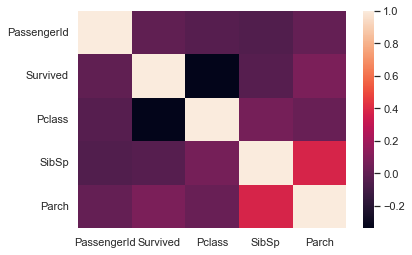

In [16]:
# Analyzing correlation between the features
print(df_num.corr())
sns.heatmap(df_num.corr())


In [17]:
# Analyzing objects
df_object.head()

,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.925,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1,C123,S
4,"Allen, Mr. William Henry",male,35.0,373450,8.05,NaN,S


In [18]:
# Analyzing Sex data
print(df_object["Sex"].value_counts())
pd.pivot_table(df, index = 'Survived', columns = 'Sex',values = 'Ticket', aggfunc = 'count')

male      843
female    466
Name: Sex, dtype: int64


Sex,female,male
Survived,,
0.0,81,468
1.0,233,109


Here it is shown that male passengers were more likely to die in the accident

In [19]:
# Analyzing Age data
print(df_object["Age"].value_counts())

24.0      30
22.0      27
18.0      26
28.0      25
30.0      25
19.0      25
21.0      24
25.0      23
36.0      22
29.0      20
32.0      18
27.0      18
26.0      18
35.0      18
31.0      17
21        17
24        17
16.0      17
22        16
23.0      15
34.0      15
20.0      15
30        15
33.0      15
39.0      14
40.0      13
42.0      13
18        13
17.0      13
26        12
27        12
45.0      12
38.0      11
23        11
25        11
2.0       10
4.0       10
50.0      10
29        10
48.0       9
45         9
36         9
44.0       9
47.0       9
54.0       8
20         8
9.0        8
1.0        7
51.0       7
17         7
28         7
14.0       6
32         6
49.0       6
37.0       6
52.0       6
33         6
41.0       6
55         6
39         6
3.0        6
31         6
47         5
35         5
40         5
42         5
41         5
50         5
48         5
43.0       5
58.0       5
15.0       5
56.0       4
60.0       4
8.0        4
11.0       4
43         4

In [20]:
# Analyzing Ticket Data
print(df_object["Ticket"].value_counts())

CA. 2343              11
CA 2144                8
1601                   8
PC 17608               7
S.O.C. 14879           7
347077                 7
347082                 7
3101295                7
19950                  6
113781                 6
347088                 6
382652                 6
4133                   5
W./C. 6608             5
PC 17757               5
349909                 5
220845                 5
113503                 5
16966                  5
LINE                   4
C.A. 33112             4
PC 17755               4
C.A. 34651             4
12749                  4
PC 17760               4
230136                 4
SC/Paris 2123          4
W./C. 6607             4
PC 17483               4
2666                   4
C.A. 2315              4
17421                  4
113760                 4
24160                  4
36928                  4
S.C./PARIS 2079        3
315153                 3
371110                 3
PC 17761               3
PC 17558               3


S    914
C    270
Q    123
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

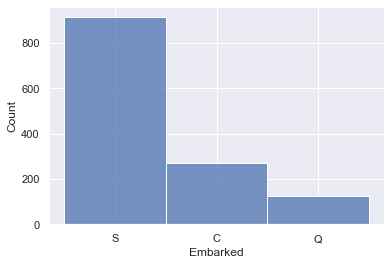

In [21]:
# Analyzing Embarked values with histogram
print(df_object["Embarked"].value_counts())
sns.set(style = 'darkgrid')
sns.histplot(data = df_object['Embarked'], bins = 10)

In [22]:
# Finding a number of missing values in each column
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

The cell above show that there are 418 null values in Survived column, 263 in Age, 1014 in Cabin, and 2 in Embarked. We need to fullfil these values before performing machine learning.

### Data Cleaning

In [68]:
# Dropping the missing values in Embarked column
df_final = df.copy()
df_final.dropna(subset = ['Embarked'], inplace = True)
df_final.Embarked.isnull().sum()
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
# Encoding all the values to number
#all_dummies = pd.get_dummies(df[['Pclass','Sex','SibSp','Parch','Embarked']])
#all_dummies

In [70]:
new_age = []
for age in df_final.Age:
    try:
        float(age)
        new_age.append(age)
    except:
        string = age.split('.')
        new_age.append(float(string[0]))

df_final.insert(6,'Ages_cleaned', new_age, True)
df_final = df_final.drop('Age', axis = 1)
df_final.Ages_cleaned = df_final.Ages_cleaned.fillna(df_final.Ages_cleaned.median())
df_final.Ages_cleaned

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      28.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     28.0
18     31.0
19     28.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     28.0
27     19.0
28     28.0
29     28.0
30     40.0
31     28.0
32     28.0
33     66.0
34     28.0
35     42.0
36     28.0
37     21.0
38     18.0
39     14.0
40     40.0
41     27.0
42     28.0
43      3.0
44     19.0
45     28.0
46     28.0
47     28.0
48     28.0
49     18.0
50      7.0
51     21.0
52     49.0
53     29.0
54     65.0
55     28.0
56     21.0
57     28.5
58      5.0
59     11.0
60     22.0
62     45.0
63      4.0
64     28.0
65     28.0
66     29.0
67     19.0
68     17.0
69     26.0
70     32.0
71     16.0
72     21.0
73     26.0
74     32.0
75     25.0
76     28.0
77     28.0
78     0.83
79     30.0
80     22.0
81     29.0
82     28.0
83     28.0
84  

In [71]:
df_final.Ages_cleaned = pd.to_numeric(df_final.Ages_cleaned, errors = 'coerce')
df_final.Ages_cleaned = df_final.Ages_cleaned.fillna(df_final.Ages_cleaned.median)
df_final


,PassengerId,Survived,Pclass,Name,Sex,Ages_cleaned,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,28.00,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.075,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [72]:
df_final = df_final.drop(df_final[['Name', 'Cabin', 'Ticket', 'Fare']], axis = 1)


In [73]:
# Encoding the objects with numbers
#all_dummies = pd.get_dummies(df[['Pclass','Sex','SibSp','Parch','Embarked']])

df_final = pd.get_dummies(df_final[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Ages_cleaned', 'SibSp','Parch', 'Embarked']])


In [74]:
df_final.info()
df_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1307 non-null   int64  
 1   Survived      889 non-null    float64
 2   Pclass        1307 non-null   int64  
 3   Ages_cleaned  1307 non-null   float64
 4   SibSp         1307 non-null   int64  
 5   Parch         1307 non-null   int64  
 6   Sex_female    1307 non-null   uint8  
 7   Sex_male      1307 non-null   uint8  
 8   Embarked_C    1307 non-null   uint8  
 9   Embarked_Q    1307 non-null   uint8  
 10  Embarked_S    1307 non-null   uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 77.9 KB


(1307, 11)

In [76]:
df_finals = df_final.copy()


In [77]:
train_data = df_finals[df_finals['Survived'].isna()==False]
train_data

,PassengerId,Survived,Pclass,Ages_cleaned,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,22.00,1,0,0,1,0,0,1
1,2,1.0,1,38.00,1,0,1,0,1,0,0
2,3,1.0,3,26.00,0,0,1,0,0,0,1
3,4,1.0,1,35.00,1,0,1,0,0,0,1
4,5,0.0,3,35.00,0,0,0,1,0,0,1
5,6,0.0,3,28.00,0,0,0,1,0,1,0
6,7,0.0,1,54.00,0,0,0,1,0,0,1
7,8,0.0,3,2.00,3,1,0,1,0,0,1
8,9,1.0,3,27.00,0,2,1,0,0,0,1
9,10,1.0,2,14.00,1,0,1,0,1,0,0


In [78]:
dropped_frames = train_data[['Survived', 'PassengerId']]
x_train = train_data.drop(dropped_frames, axis = 1)
y_train = train_data.Survived

In [83]:
test_data = df_finals[df_finals['Survived'].isna()==True]
dropped_frames = test_data[['Survived', 'PassengerId']]
x_test = test_data.drop(dropped_frames, axis = 1)
y_test = test_data.Survived

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.78651685 0.78651685 0.75280899 0.80898876 0.78651685 0.7752809
 0.78651685 0.78651685 0.82022472 0.82954545]
0.7919433094994893


In [94]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [96]:
predictions = lr.predict(x_test)
predictions.shape

(418,)

In [121]:
example_df = pd.read_csv("gender_submission.csv",encoding = "latin1", sep=";")
example_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [122]:
example_df["Survived"] = predictions
example_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [123]:
example_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0


In [125]:
#example_df.to_csv('my_sub', sep='\t', encoding='utf-8')
example_df.to_csv('mine')

In [127]:
test_id = example_df.PassengerId


In [134]:

my_submission = pd.DataFrame({'PassengerId': test_id, 'Survived': predictions})
my_submission ["Survived"] = pd.to_numeric(my_submission["Survived"], downcast = 'signed')
my_submission
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)